4.9 Part 2

# Contents
Import Merged DF
Rename Columns
Create Bar Chart
Create Histogram
Create Sample
Create Line Chart
Create Histogram
Loyalty Flag
Export Visualizations

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
path = r'C:\Users\justi\Instacart Basket Analysis 12-22'

In [2]:
df = pd.read_pickle(os.path.join(path, '02 Data', '02 Prepared Data', 'merged4_9.pkl'))

In [3]:
df.shape

(32404859, 30)

In [4]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Before I Create My Charts, I want to rename a column

In [5]:
#rename
df.rename(columns = {'order_dow' : 'orders_day_of_week'}, inplace = True)

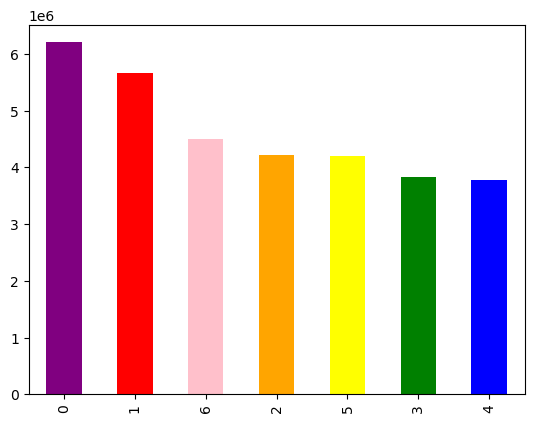

In [6]:
#bar
bar = df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

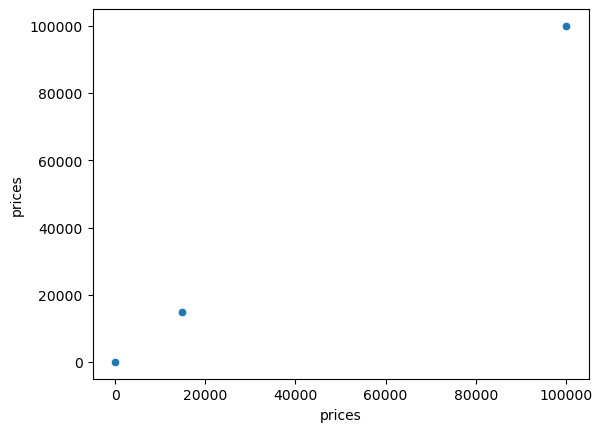

In [7]:
#Scatterplot
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = df)

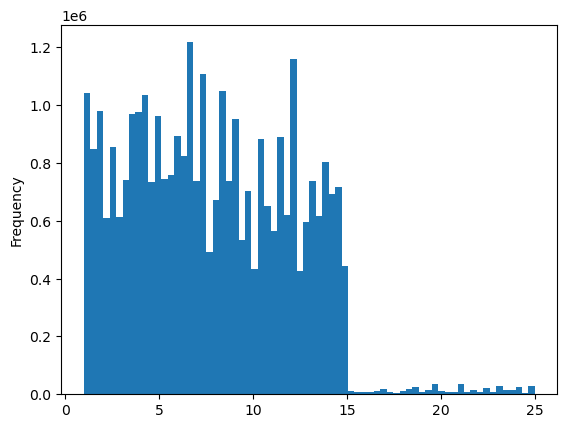

In [8]:
#histogram
df.loc[df['prices'] >100, 'prices'] = np.nan
hist = df['prices'].plot.hist(bins = 70)

In [9]:
#Line Chart
dev = np.random.rand(len(df)) <= 0.7
big = df[dev]
small = df[~dev]

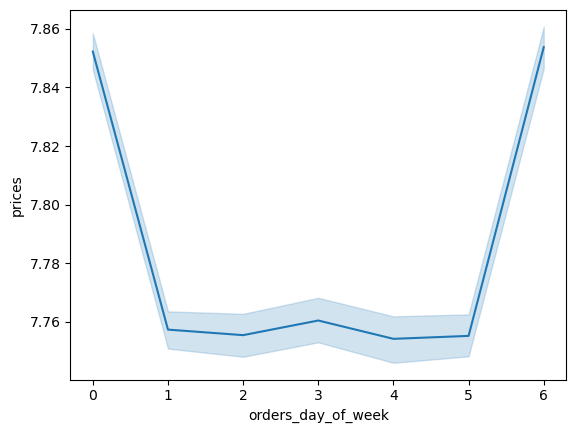

In [10]:
df_line = small[['orders_day_of_week', 'prices']]
line = sns.lineplot(data = df_line, x = 'orders_day_of_week', y = 'prices')

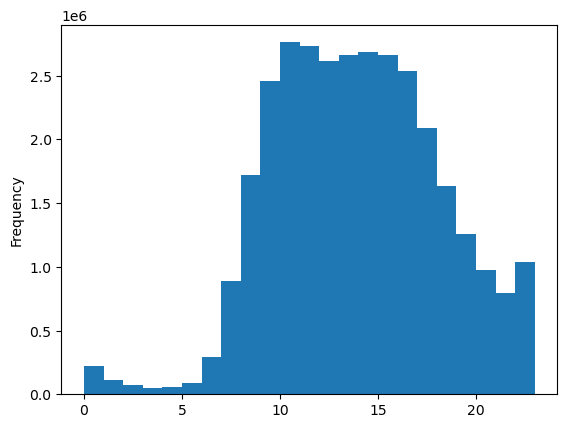

In [11]:
#Histogram for Q3
hist_2 = df['order_hour_of_day'].plot.hist(bins = 23)

In [12]:
df.order_hour_of_day.value_counts().sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

Sales are mainly performed between 8:00 and 17:00. Sales reach an alltime high at 10:00. Sales are the lowest between 24:00 and 6:00.

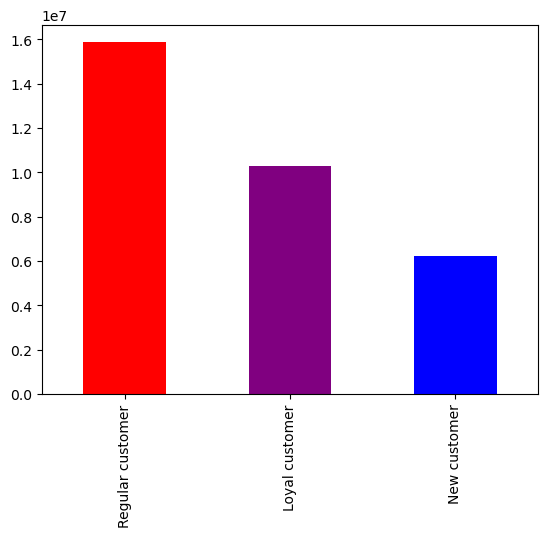

In [13]:
#Bar for Q4
bar_2 = df['loyalty_flag'].value_counts().plot.bar(color =['red', 'purple', 'blue'])

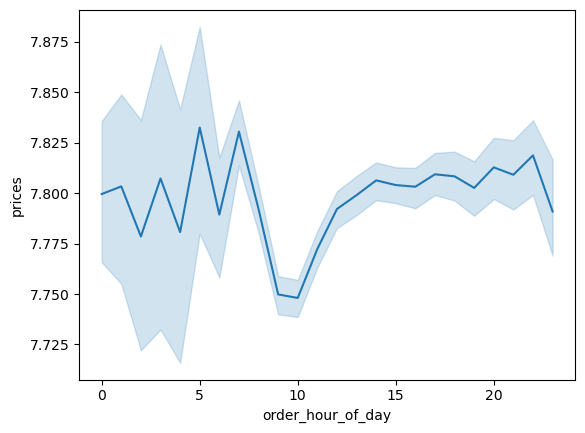

In [14]:
#Line Chart for Q5
dev = np.random.rand(len(df)) <= 0.7
big = df[dev]
small = df[~dev]
df_line_2 = small[['order_hour_of_day', 'prices']]
line_2 = sns.lineplot(data = df_line_2, x = 'order_hour_of_day', y = 'prices')

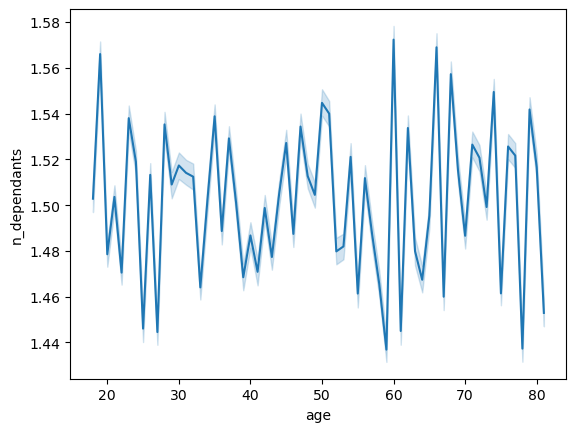

In [15]:
df_line_3 = small[['age', 'n_dependants']]
line_3 = sns.lineplot(data = df_line_3, x = 'age', y = 'n_dependants')

The line chart shows that individuals around the age of 20 have dependents. At the age of 60 people tend to have the most dependents; However, right after the age of 60 the number of dependents belonging to an invidual is also the lowest. after the dip it returns to about the average. Overall, the graph shows that the average number of dependents stays within a .15 range. I would say there is not that much correlation between age and dependents. 

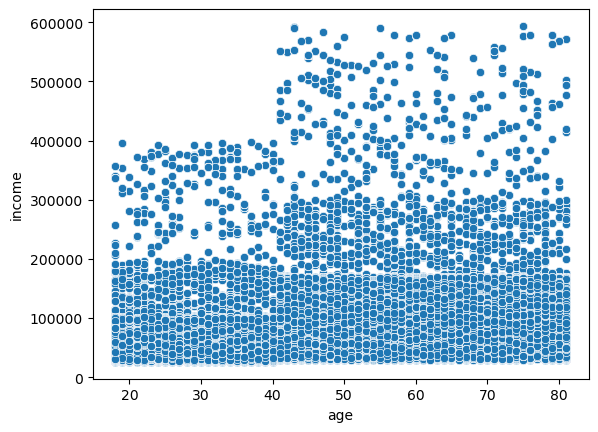

In [16]:
#Scatter Plot Q7
scatterplot_2 = sns.scatterplot(x = 'age', y = 'income',data = df)

The scatterplot shows that the majority of values for income is below 200,000 at all ages. There is an apparent jump of some individuals having income higher than 400,000 that are 40 and older. 

In [17]:
#Export Charts
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar.png'))
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot.png'))
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist.png'))
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line.png'))
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_2.png'))
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_2.png'))
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_2.png'))
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_3.png'))
scatterplot_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_2.png'))